#LabWeek9: Prevent Overfitting - Part I

## Importing Dataset: IMDB

In [4]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Note:** We first encountered this dataset in `LabWeek5`. You can refer to that notebook for clarification on the text-to-numbers decoding process. Through vectorizing process we turn text data into vectors.

**Perform some sanity checks on the dataset:** For example, find the `shape` of the dataset and print samples to make sense of the data.

In [3]:
#TODO: your code here

print("x_train shape:", x_train.shape)  # (25000, 10000)
print("x_test shape:", x_test.shape)    # (25000, 10000)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


#First two vacter samples and print label
print("Frist samle: ", x_train[0][:20])
print("First label: ", y_train[0])

# Total 25,000 dataset consist of training samples and test samples
# Each sample converted 10,000 vacters and If 1 exsist in specific index, this is appear in review

x_train shape: (25000, 10000)
x_test shape: (25000, 10000)
y_train shape: (25000,)
y_test shape: (25000,)
Frist samle:  [0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
First label:  1.0


## Fighting overfitting -  Reducing the network's size


The general workflow to find an appropriate model size is to start with relatively few layers and
parameters, and start increasing the size of the layers or adding new layers until you see diminishing returns with regard to the
validation loss.



**Note:** we use `test set` as our `validation set`.

**Complete the following code for `original model` architecture**

In [5]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
#TODO: add one hidden layer with 16 units with proper activation function

original_model.add(layers.Dense(1, activation='sigmoid'))

#TODO: add the output layer. Remember our task is binary classificaion, whether a review is 0:negative or 1:positive.

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
original_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │         160,016 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,016 (625.06 KB)

 Trainable params: 160,016 (625.06 KB)

 Non-trainable params: 0 (0.00 B)

✔ This model is quit simple because it is small amount of network however if it is going big, it can be overfittings

**Define another model with fewer parameters. 4 units in each hidden layer.**

In [13]:
smaller_model = models.Sequential()
#TODO: add hidden/ouput layers and compile the smaller model

#input layer / 4unit, relu activate
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))

# Additional hidden layer / 4 unit relu activated
smaller_model.add(layers.Dense(4, activation = 'relu'))

#Print layer / 1 unit, sigmoid activated
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics = ['acc']
    )

smaller_model.summary()

#✔my note
# 작은 모델은 파라미터 수가 적음으로 과대적합에 덜 민감하지만 표현력 제한으로 인해 학습 성능이 낮을 수도 있다.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 4)                   │          40,004 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,029 (156.36 KB)

 Trainable params: 40,029 (156.36 KB)

 Non-trainable params: 0 (0.00 B)


**Train (1) original_model and (2) smaller_model seperately for `epochs=20` and `batch_size=512`. Also pass `x_test` and `y_test` as `validation_data`.**

In [16]:
#TODO: your code here for training original_model
original_hist = original_model.fit(
    x_train, y_train,
    epochs=3,
    batch_size=512,
    validation_data=(x_test, y_test)
)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - acc: 0.9466 - loss: 0.1622 - val_acc: 0.8852 - val_loss: 0.2880
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - acc: 0.9522 - loss: 0.1449 - val_acc: 0.8839 - val_loss: 0.2921
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - acc: 0.9572 - loss: 0.1387 - val_acc: 0.8813 - val_loss: 0.3022


In [15]:
#TODO: your code here for training original_model
smaller_hist = smaller_model.fit(
    x_train, y_train,
    epochs=3,
    batch_size=512,
    validation_data=(x_test, y_test)
)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - acc: 0.6270 - loss: 0.6630 - val_acc: 0.8550 - val_loss: 0.5558
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - acc: 0.8656 - loss: 0.5061 - val_acc: 0.8726 - val_loss: 0.4269
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - acc: 0.8963 - loss: 0.3765 - val_acc: 0.8806 - val_loss: 0.3489


**`orginal_hist` and `smaller_hist` are `objects` returned after training the models.**
- We can get access to the `history` attribute of `origial_hist` object through dot operator.
- TODO: The history attribute is a data structure of type `dictionary` containing data about everything that happened during training. Show the `keys` of this `dictionary`.

In [18]:
print(original_hist.history)
#TODO: print out the keys of the output dictionary
#your code here

print("Original model history key", original_hist.history.keys())

{'acc': [0.9446799755096436, 0.9484800100326538, 0.9543200135231018], 'loss': [0.16144771873950958, 0.15022476017475128, 0.14022018015384674], 'val_acc': [0.8852400183677673, 0.8839200139045715, 0.8812800049781799], 'val_loss': [0.28801485896110535, 0.2921200692653656, 0.30220827460289]}
Original model history key dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])


**Plot `val_loss` vs. epochs for both models in one plot**

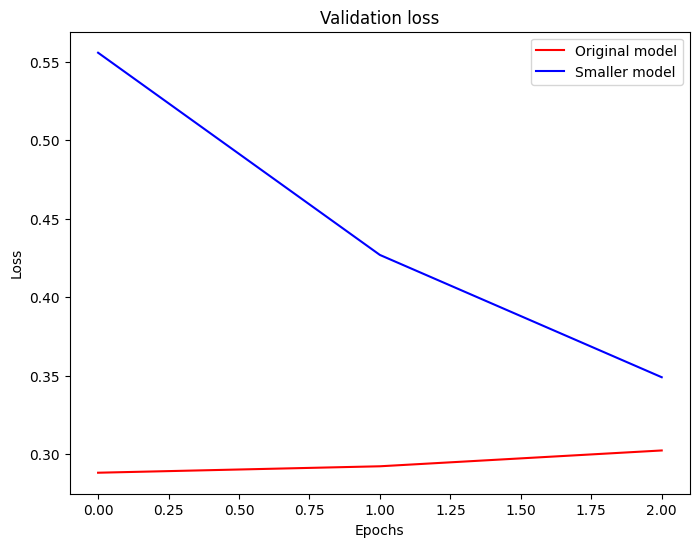

In [20]:
from matplotlib import pyplot as plt
#TODO: your code here

epochs = range(0, 3)

plt.figure(figsize=(8,6))
plt.plot(epochs, original_hist.history['val_loss'], 'r', label='Original model')
plt.plot(epochs, smaller_hist.history['val_loss'], 'b', label='Smaller model')

plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Plot training `loss` vs. epochs for both models in one plot**

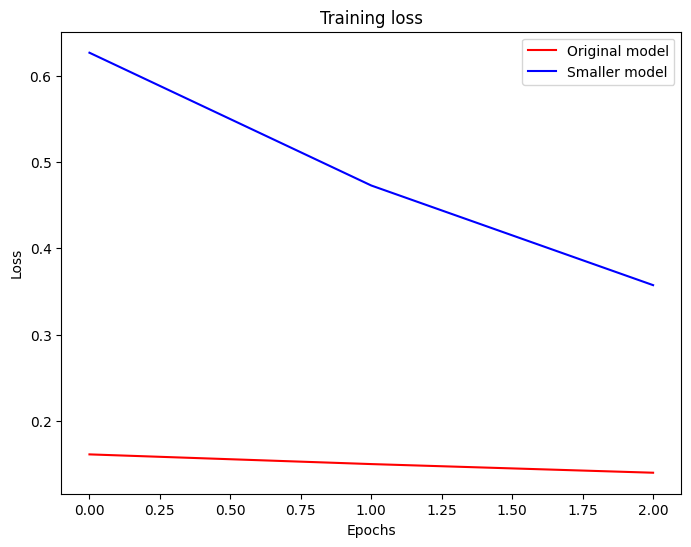

In [21]:
#TODO: your code hereß

plt.figure(figsize=(8,6))
plt.plot(epochs, original_hist.history['loss'], 'r', label='Original model')
plt.plot(epochs, smaller_hist.history['loss'], 'b', label='Smaller model')

plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#노트: 모델의 용량이 클수록 훈련 손실은 빠르게 감소하지만, 동시에 검증 손실은 일정 시점부터 다시 증가하는 경향(과대적합)이 나타남!!!

**Questions:** Which model overfits earlier? How can you see the size of the model on overfitting?

**Answer:** original model, 16unit is overfitting earlier than smaller model. why, original model has many parameters. it makes training complex patern so it can descrse data loss but at the same time test data can be decrese nomalization, so it can increase lose data.

**Now define a very large model (e.g., with 512 units in hidden layer) and compare the `loss` and `val_loss` of this big model and the `original model` and `smaller_model`.**

In [16]:
#your code here

# big_model 512bites
big_model = models.Sequential()
big_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))

# single layer added
big_model.add(layers.Dense(1, activation='sigmoid'))

big_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

big_model.summary()

# big model training
big_hist = big_model.fit(x_train, y_train,
                         epochs=20,
                         batch_size=512,
                         validation_data=(x_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 512)                 │       5,120,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121,025 (19.54 MB)

 Trainable params: 5,121,025 (19.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 566ms/step - acc: 0.7103 - loss: 0.5614 - val_acc: 0.8746 - val_loss: 0.3207
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 37s 499ms/step - acc: 0.8772 - loss: 0.2998 - val_acc: 0.8879 - val_loss: 0.2806
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 24s 488ms/step - acc: 0.9151 - loss: 0.2280 - val_acc: 0.8593 - val_loss: 0.3294
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 326ms/step - acc: 0.9165 - loss: 0.2130 - val_acc: 0.8847 - val_loss: 0.2781
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 325ms/step - acc: 0.9324 - loss: 0.1780 - val_acc: 0.8617 - val_loss: 0.3274
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 19s 302ms/step - acc: 0.9408 - loss: 0.1574 - val_acc: 0.8686 - val_loss: 0.3317
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 329ms/step - acc: 0.9457 - loss: 0.1467 - val_acc: 0.8855 - val_loss: 0.2820
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 15s 305ms/step - acc: 0.9662 - loss: 0.1065 - val_acc: 0.8757 - val_loss: 0.3135
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 306ms/

**Discuss the results**

**Answer:**  big model show very fast decreases in losses for training data, while validation losses increase quickly, resulting in severe overfitting.
This demonstrates that as the model's capacity increases, the training data is overfitted, resulting in poor generalization performance.


## Fighting overfitting - Adding weight regularization


A common way to mitigate overfitting is to put constraints on the complexity
of a network by forcing its weights to only take small values. This is called
"weight regularization", and it is done by adding to the loss function of the network a _cost_ associated with having large weights. This
cost comes in two flavors:

* L1 regularization, where the cost added is proportional to the _absolute value of the weights coefficients_ (i.e. to what is called the
"L1 norm" of the weights).
* L2 regularization, where the cost added is proportional to the _square of the value of the weights coefficients_ (i.e. to what is called
the "L2 norm" of the weights). L2 regularization is also called _weight decay_ in the context of neural networks. Don't let the different
name confuse you: weight decay is mathematically the exact same as L2 regularization.

In Keras, weight regularization is added by passing _weight regularizer instances_ to layers as keyword arguments.


**Complere the model below**

In [6]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))

#TODO: Add a dense layer with 16 unuts with L2 regularization
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), # Added a dense layer with 16 units and L2 regularization
                          activation='relu'))

l2_model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

`l2(0.001)` means that every coefficient in the weight matrix of the layer will add `0.001 * weight_coefficient_value` to the total loss of
the network. Note that because this penalty is _only added at training time_, the loss for this network will be much higher at training
than at test time.



**Train the model with regularization and compare the validation loss between this model and the `original_model` and `smaller model`.**

In [22]:
#TODO: your code here

l2_hist = l2_model.fit(x_train, y_train,
                       epochs=20,
                       batch_size=512,
                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - acc: 0.7343 - loss: 0.6067 - val_acc: 0.8394 - val_loss: 0.4350
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - acc: 0.8943 - loss: 0.3439 - val_acc: 0.8863 - val_loss: 0.3384
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - acc: 0.9216 - loss: 0.2735 - val_acc: 0.8862 - val_loss: 0.3324
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - acc: 0.9295 - loss: 0.2464 - val_acc: 0.8814 - val_loss: 0.3425
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - acc: 0.9378 - loss: 0.2314 - val_acc: 0.8790 - val_loss: 0.3545
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - acc: 0.9422 - loss: 0.2184 - val_acc: 0.8815 - val_loss: 0.3485
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - acc: 0.9461 - loss: 0.2085 - val_acc: 0.8761 - val_loss: 0.3661
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - acc: 0.9444 - loss: 0.2121 - val_acc: 0.8768 - val_loss: 0.3672
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - acc: 0.9507

**Note:** As alternatives to L2 regularization, you could use one of the following Keras weight regularizers:

In [23]:
from keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

## Recap

To recap: here the most common ways to prevent overfitting in neural networks:

* Getting more training data.
* Reducing the capacity of the network.
* Adding weight regularization.
* Adding dropout. (next session)

**Observation 1:** The bigger network gets its training loss near zero very quickly. The more capacity the network has, the quicker it will be
able to model the training data (resulting in a low training loss), but the more susceptible it is to overfitting (resulting in a large
difference between the training and validation loss).

**Observation 2:** The model with L2 regularization has become much more resistant to overfitting than the reference model,
even though both models have the same number of parameters.